<h1 style="font-size: 40px; margin-bottom: 0px;">5.1 Python image analysis (I)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 800px;"></hr>

In today's lecture, we went over how images are expressed as either 2D matrices (single channel) or 3D matrices (multi-channel or true-color) with each pixel as an element in the matrix containing a numerical value representing the intensity of light. We're all familiar with using ImageJ for analyzing images, but here, we'll use Python to perform many of the same analyses that we can do in ImageJ. 

For today's notebook, we'll explore how images are represented on our computers in order to learn process our images. To do this, we'll make use of a package called <code>scikit-image</code>, which is an image processing package that uses numpy arrays. <a href="https://scikit-image.org/" rel="noopener noreferrer"><u>Information, including documentation, on <code>scikit-image</code> can be found here.</u></a>

<strong>Learning objectives:</strong>
<ul>
    <li>Learn how to import images in a Python notebook</li>
    <li>Understand how images are represented as a matrix</li>
    <li>Learn how to display images in a Python notebook</li>
    <li>Learn how to process images</li>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">Install <code>scikit-image</code> package</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Recall from MCB201A notebook 16-2 that we can install packages that we need, and for today's lesson, we will make use of the <code>scikit-image</code> package, which is not currently in our virtual environment. 

To install the <code>scikit-image</code> package, we can make use of Terminal and the <code>pip</code> command to install our package.

<pre style="width: 350px; margin-top: 15px; margin-bottom: 15px; color: #000000; background-color: #EEEEEE; border: 1px solid; border-color: #AAAAAA; padding: 10px; border-radius: 15px; font-size: 12px;">pip install scikit-image</pre>

<h1 style="font-size: 40px; margin-bottom: 0px;">Import packages for today</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

After our package is successfully installed, let's import all the packages we'll use for today's notebook. 

We'll make use of our usual packages:

<ul>
    <li><code>numpy</code></li>
    <li><code>pandas</code></li>
    <li><code>matplotlib.pyplot</code></li>
    <li><code>seaborn</code></li>
    <li><code>os</code></li>
</ul>

And we'll make use of two packages that we haven't used before:

<ul>
    <li><code>skimage</code></li>
    <li><code>scipy.ndimage</code></li>
</ul>

These two packages are useful for processing images in Python to get them ready for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import skimage as ski
import scipy.ndimage as ndi

Let's take a look to see if our <code>ski</code> package is the proper version.

In [2]:
ski.__version__

'0.25.2'

<h1 style="font-size: 40px; margin-bottom: 0px;">Importing images into Python</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

To work with our images in Python, we'll first need to import them like we would with any normal dataset. However, rather than using the panadas package and <code>pd.read_csv()</code> to import our file, we'll be using matplotlib's function <code>plt.imread()</code>. This function will read the data contained within an image file into a multidimensional array that we can then work with in Python.

Let's give it a try with a grayscale image of Liebchen.

In [3]:
liebchen = plt.imread('./ref-images/liebchen-gray.jpg')

As you recall from lecture, an 8-bit grayscale image is represented as a 2D matrix containing values from 0 (black) to 255 (white). We can take a look at a slice of our imported image to see how the image file is understood by Python.

In [4]:
print(type(liebchen))

<class 'numpy.ndarray'>


In [5]:
print(liebchen[:10, :10])

[[186 186 187 189 192 197 201 203 208 208]
 [193 194 195 198 201 205 208 210 210 209]
 [201 203 205 208 211 212 213 214 212 209]
 [207 208 211 213 214 213 212 211 209 206]
 [209 210 211 212 211 209 207 205 203 201]
 [210 210 209 208 206 204 201 200 199 197]
 [208 207 205 202 200 199 198 198 197 197]
 [206 204 201 198 196 195 196 196 198 197]
 [201 200 199 197 196 196 196 196 194 194]
 [200 199 197 195 194 194 193 194 193 193]]


What you can see is that each pixel is represented by a value that represents its grayscale value. In this case, our image file is an 8bit grayscale image, so we have a single 2D array where the values can span 0-255. 

In [8]:
print(type(liebchen[0,0]))

<class 'numpy.uint8'>


In [9]:
print(2**16)

65536


<h1 style="font-size: 40px; margin-bottom: 0px;">Exploring grayscale images in Python</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

To render this image in our Python notebook, we can make use of matplotlib, but this time instead of using this library to display our plots, we'll use it to display our images. To do this, we'll make use of the <code>plt.imshow()</code> function. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <code>plt.imshow()</code> can be found here.</u></a> 

If we dig into the documentation, we'll see that we can pass a 2D numpy array to the function along with additional arguments to adjust how the image will be displayed/rendered. First, let's display our image with the default parameters.

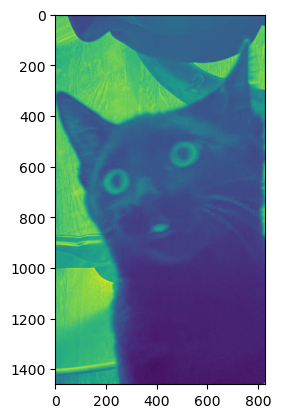

In [10]:
plt.imshow(liebchen)

You can see that by default, the colormap <code>cmap</code> will be a colormap called <a href="https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html" rel="noopener noreferrer"><u>'viridis', which was developed to improve readability and accessibility of quantitative data visualizations, such as as heatmaps</u></a>. To display our image as a grayscale image, we can pass <code>'gray'</code> to the <code>cmap</code> parameter.

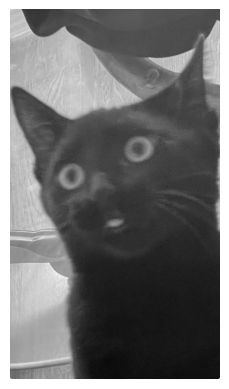

In [15]:
plt.imshow(liebchen,
           cmap='gray',
          )
plt.axis(False);

We can also specify what value corresponds to pure black and what value corresponds to pure white using the <code>vmin</code> and <code>vmax</code> parameters, respectively. You'll want to keep in mind that the underlying data isn't changed by adjusting the <code>vmin</code> and the <code>vmax</code>. These parameters change how the image is displayed/rendered.

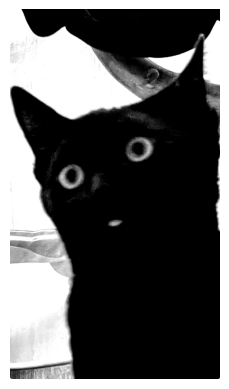

In [17]:
plt.imshow(liebchen,
           cmap='gray',
           vmin=100,
           vmax=175,
          )
plt.axis(False);

Since our images are 2D arrays, we can also use slice notation to pull out portions of our image.

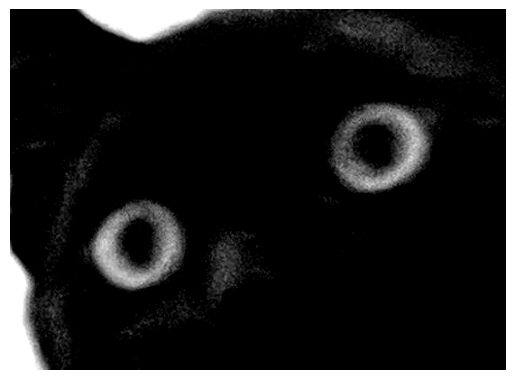

In [19]:
plt.imshow(liebchen[400:800, 100:650],
           cmap='gray',
           vmin=100,
           vmax=175,
          )
plt.axis(False);

<h1 style="font-size: 40px; margin-bottom: 0px;">Exploring color images in Python</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

Recall from lecture that true-color images are represented by three channels that are overlaid one on top of the other to display the final color. Let's import a color image and then explore how its represented as a 3D numpy array.

In [20]:
liebchen_color = plt.imread('./ref-images/liebchen-color.jpg')

Recall from lecture that true color images are represented by a stack of three 2D arrays, where each 2D array corresponds to an individual channel, either red, green, or blue. Let's take a look at how the array itself looks like.

In [21]:
print(liebchen_color)

[[[204 196 173]
  [203 195 172]
  [202 194 171]
  ...
  [ 62  82 109]
  [ 64  84 111]
  [ 64  84 111]]

 [[207 199 176]
  [208 200 177]
  [209 201 178]
  ...
  [ 62  82 109]
  [ 63  83 110]
  [ 63  83 110]]

 [[212 204 181]
  [215 207 184]
  [219 211 188]
  ...
  [ 62  82 109]
  [ 62  82 109]
  [ 61  81 108]]

 ...

 [[255 254 227]
  [241 226 197]
  [185 164 133]
  ...
  [ 79  80  72]
  [255 254 241]
  [229 228 210]]

 [[232 220 194]
  [255 248 221]
  [249 230 200]
  ...
  [242 243 235]
  [234 232 219]
  [247 246 228]]

 [[255 246 219]
  [255 249 221]
  [255 239 212]
  ...
  [239 241 230]
  [240 238 225]
  [246 245 227]]]


What you can see is that based on the syntax of our 3D matrix, it is a bit difficult to exactly tease out complete information on each channel by simply looking at the object in its entirety. From earlier, we know from our experience with 2D objects, like pandas DataFrames, that the dimensions are ordered as <code>&lbrack;a, b&rbrack;</code> with the first dimension <code>a</code> corresponding to the number of rows (height of our image), and the second dimension <code>b</code> to the number of columns (width of our image). So then for our 3D image, which is just our 2D arrays stacked one on top of another along a third dimension <code>c</code>:

<p style="font-size: 16px; text-align: center;"><strong>True-color image as 3D array</strong></p>
<img src="./ref-images/array-explanation.jpg" style="height: 300px; margin: auto"/>

So then, our true-color image can be represented as the 3D array <code>&lbrack;a, b, c&rbrack;</code>.

This means that for a 3-channel true-color image, the values for c will be either <code>0</code>, <code>1</code>, or <code>2</code>, representing grayscale intensity values for red, green, and blue, respectively. Let's pull out a single row from our true-color image to look at the RGB values.

In [26]:
print(liebchen_color[0, 0:5, :])

[[204 196 173]
 [203 195 172]
 [202 194 171]
 [203 195 172]
 [206 198 175]]


And if we wanted all three channels of a single pixel:

In [23]:
print(liebchen_color[0, 0, :])

[204 196 173]


So if we wanted a single channel, we can specify that as the third dimension. For our single pixel:

In [24]:
print(liebchen_color[0, 0, 0])

204


If we wanted the full 2D array for a single channel, we'll need to specify that we want all values from the first two dimensions, and just a single value for our third dimension.

In [29]:
print(liebchen_color[0:10, 0:10, 2])

[[173 172 171 172 175 180 185 188 189 191]
 [176 177 178 181 185 188 191 192 190 189]
 [181 184 188 192 195 197 197 196 195 191]
 [188 190 194 197 198 197 196 194 195 190]
 [193 193 193 193 192 190 188 187 187 184]
 [193 192 190 187 185 183 182 181 181 179]
 [190 189 186 184 181 180 179 179 179 179]
 [187 186 185 183 181 180 180 180 179 179]
 [179 179 179 179 179 180 181 181 179 178]
 [184 183 181 179 177 176 175 174 175 174]]


We can then plot a single channel using the same function we used before.

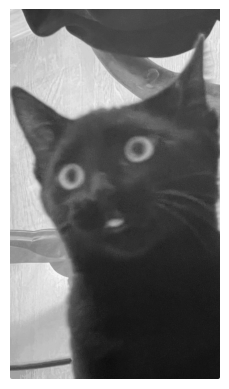

In [30]:
plt.imshow(liebchen_color[:, :, 0],
           cmap='gray',
           vmin=0,
           vmax=255,
          )
plt.axis(False);

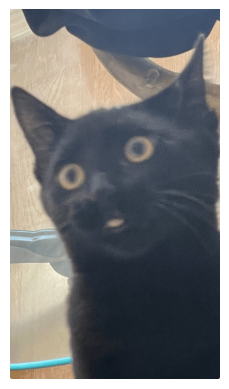

In [31]:
plt.imshow(liebchen_color
          )
plt.axis(False);

Let's plot all three channels in grayscale side-by-side using <code>plt.implot()</code>.

In [32]:
print(np.arange(0, 3, 1))

[0 1 2]


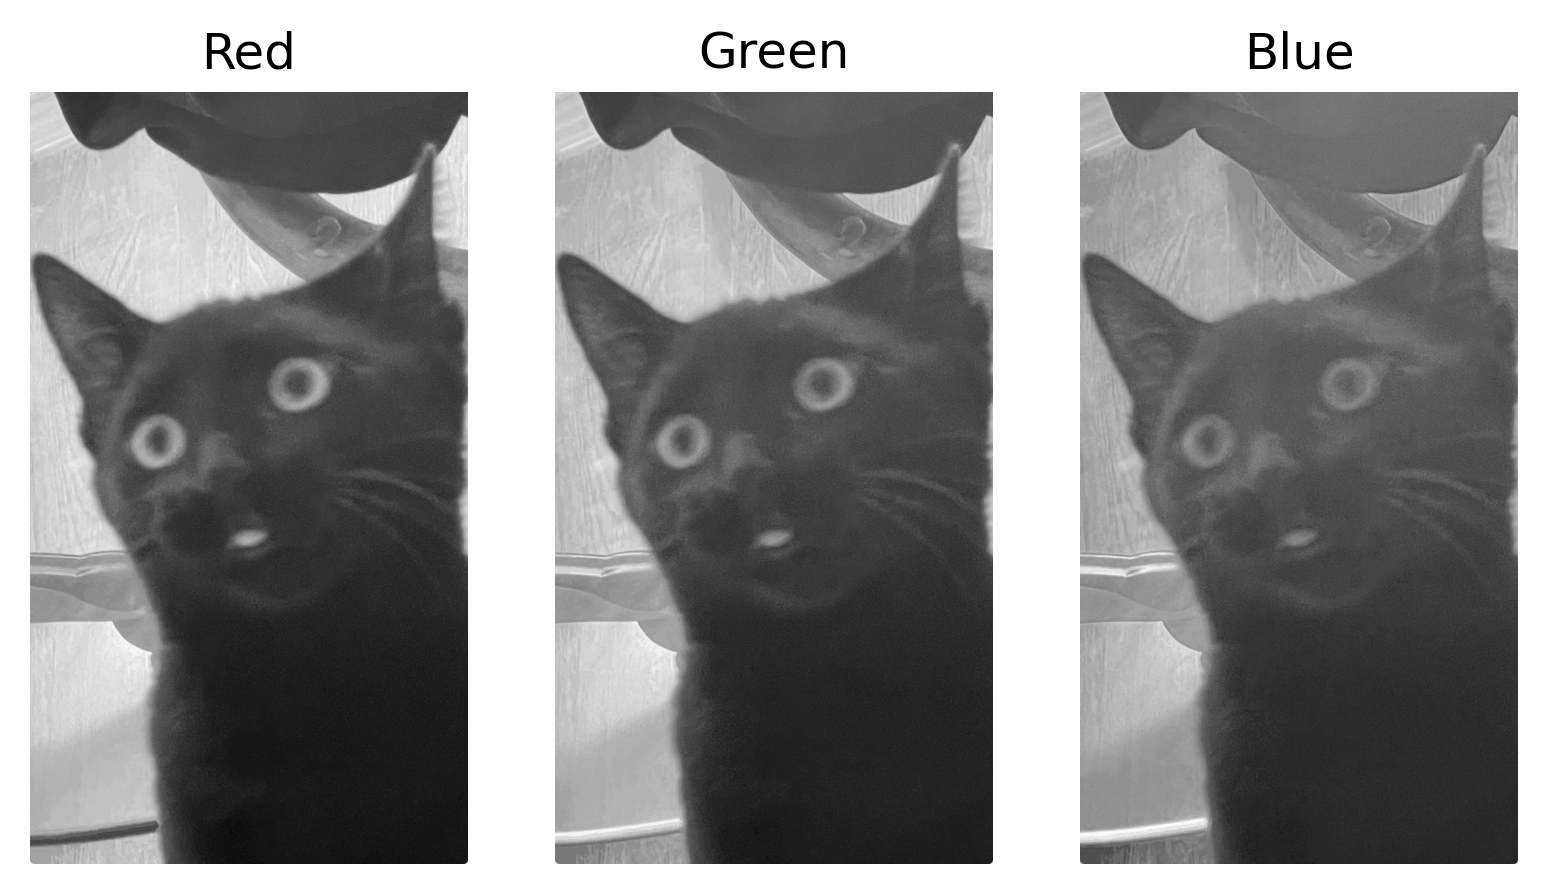

In [33]:
fig, ax = plt.subplots(1, 3)

channel = ['Red', 'Green', 'Blue']

for i in np.arange(0, 3, 1):
    ax[i].imshow(liebchen_color[:,:, i],
                 cmap='gray',
                 vmin=0,
                 vmax=255
                )
    ax[i].set_title(channel[i])
    ax[i].axis(False);

fig.set_dpi(300)

<h1 style="font-size: 40px; margin-bottom: 0px;">Assembling a composite image</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

More often than not, we're imaging our samples one channel at a time, so if we want to display our images as a composite, we need to construct a 3D array out of our separate 2D arrays. We can do this by using the <code>np.dstack()</code> function, which will stack/concatenate our arrays along the third axis. <a href="https://numpy.org/doc/stable/reference/generated/numpy.dstack.html" rel="noopener noreferrer"><u>Documentation for <code>np.dstack()</code> can be found here.</u></a>

Recall from earlier that the position of our 2D arrays in the 3rd dimension, specifies what channel it's in, so it's important to keep this in mind so that you know what channel(s) you are pulling out or compositing.

In [39]:
liebchen_red, liebchen_green, liebchen_blue = liebchen_color[: , : , 0], \
liebchen_color[: , : , 1], \
liebchen_color[: , : , 2]

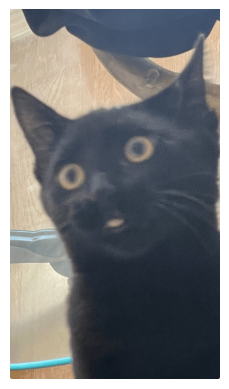

In [38]:
composite = np.dstack([liebchen_red, liebchen_green, liebchen_blue])

plt.imshow(composite,
          )

plt.axis(False);

For example, if we mix up the channels, our true-color image won't be accurate to what we want it to show.

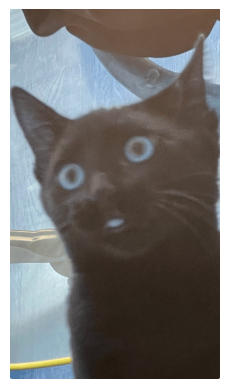

In [40]:
mixup = np.dstack([liebchen_blue, liebchen_green, liebchen_red])

plt.imshow(mixup,
          )

plt.axis(False);

<h1 style="font-size: 40px; margin-bottom: 0px;">Pseudocolor an image</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

We can take what we know about how true-color images are built up as a composite of three channels to also pseudocolor our images. If we repeat a single channel in all three channels, we will end up again with a grayscale image:

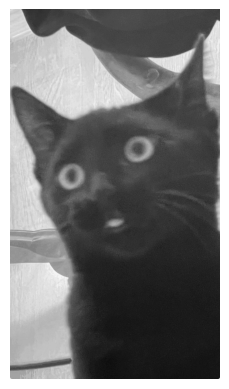

In [42]:
stack = np.dstack([liebchen_red, liebchen_red, liebchen_red])

plt.imshow(stack,
          )

plt.axis(False);

We can then take what we know about mathematical operations on arrays to then adjust the values for each channel. If we want to then pseudocolor our grayscale image red, we can zero-out the green and blue channels.

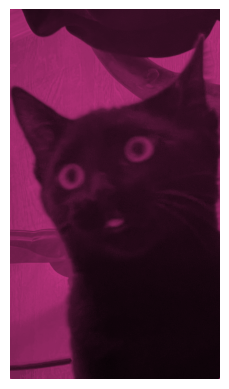

In [56]:
stack = np.dstack([liebchen_red, liebchen_red, liebchen_red])

plt.imshow(np.dstack([liebchen_red, liebchen_red, liebchen_red])*[0.75, 0.2, 0.5]/255,
          )

plt.axis(False);

We can also achieve the same result by setting up a 2D array of zeros of the same dimensions as our image, and placing it in the positions corresponding to the channels we don't want to use. To set up an array of zeros that are the same dimensions as another object, we can make use of the <code>np.zeros_like()</code> function. <a href="https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html" rel="noopener noreferrer"><u>Documentation for <code>np.zeros_like()</code> can be found here.</u></a>

This function takes an object as an argument and then will initialize an array of zeros that matches the shape of the object that it was given, so if we provide it with one of our 2D arrays corresponding to our image, it will generate an array of zeros of the same shape as our image.

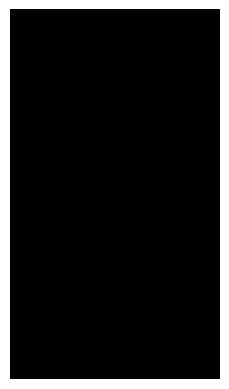

In [52]:
void = np.zeros_like(liebchen_red)

plt.imshow(void,
           cmap='gray'
          )

plt.axis(False);

Let's then assemble the three channels with two of them assigned our array of zeros and generate an image.

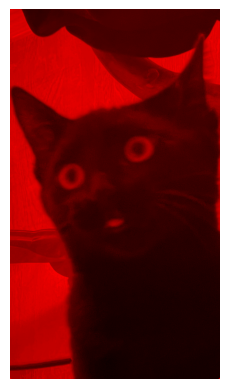

In [53]:
plt.imshow(np.dstack([liebchen_red, void, void]))

plt.axis(False);

We can also mess with the numbers to pseudocolor our image in a color that isn't exactly red, green, or blue.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exporting processed images</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

Since we're using matplotlib to render our images, we can make use of our usual <code>plt.savefig()</code> or <code>fig.savefig()</code> functions to export our processed images. This time, instead of specifying our images with the extension <code>.pdf</code>, we can specify <code>.jpg</code> or another image extension, and our image will be exported as that file type.

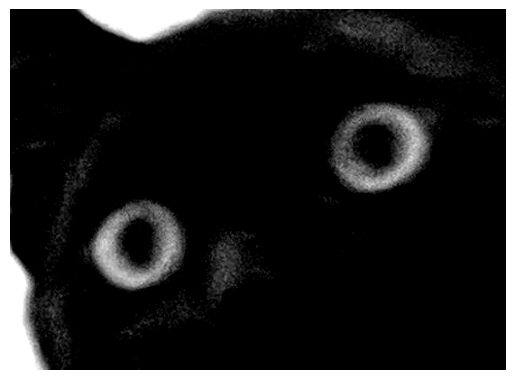

In [59]:
plt.imshow(liebchen[400:800, 100:650],
           cmap='gray',
           vmin=100,
           vmax=175,
          )
plt.axis(False)

plt.savefig('meow.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Import fluorescence data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For the first set of exercises, let's take what we've learned and then apply it to our fluorescence data from MCB201A. First we'll import our fluorescence data files under the <code>data</code> subdirectory. We'll import all the files and apply what we know about how images are represented to process our fluorescence data and analyze them to extract quantitative data.

You can load it in one by one or if you remember from when we worked with multiple files for statistical analysis, see if you can apply that here to load in the data for today.

In [3]:
file_names = [name for name in os.listdir('./data') if '.tiff' in name]

In [4]:
file_names

['serum-dapi.tiff',
 'no-serum-yap.tiff',
 'serum-phalloidin.tiff',
 'serum-yap.tiff',
 'no-serum-dapi.tiff',
 'no-serum-phalloidin.tiff']

In [5]:
no_serum_names = [name for name in file_names if 'no-serum' in name]
no_serum_names.sort()

In [6]:
no_serum_names

['no-serum-dapi.tiff', 'no-serum-phalloidin.tiff', 'no-serum-yap.tiff']

In [7]:
serum_names = [name for name in file_names if 'no-serum' not in name]
serum_names.sort()

In [8]:
serum_names

['serum-dapi.tiff', 'serum-phalloidin.tiff', 'serum-yap.tiff']

In [9]:
os.getcwd()

'/home/jovyan/MCB201B_F2025/Week_5'

In [10]:
no_serum = np.zeros(len(no_serum_names), dtype=object)
serum = np.zeros(len(serum_names), dtype=object)

for i in range(0, len(no_serum_names), 1):
    no_serum[i] = plt.imread(f'./data/{no_serum_names[i]}')
    serum[i] = plt.imread(f'./data/{serum_names[i]}')

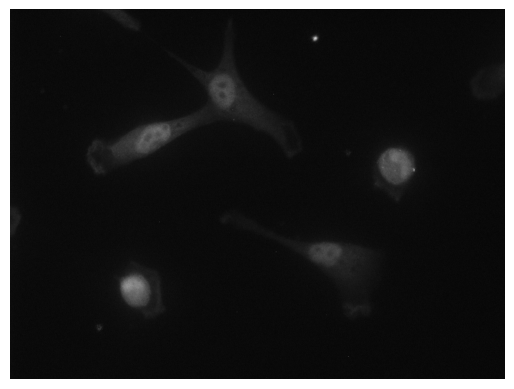

In [13]:
plt.imshow(serum[2],
           cmap='gray',
           vmin=0,
           vmax=1500,
          )

plt.axis(False);

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Pseudocolor channels</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

See if you can take what you've learned to then pseudocolor an individual channel from our set of images. Select either the no serum or serum stimulation condition and psuedocolor each channel for that treatment condition.

In [14]:
print(type(no_serum[0][0,0]))

<class 'numpy.uint16'>


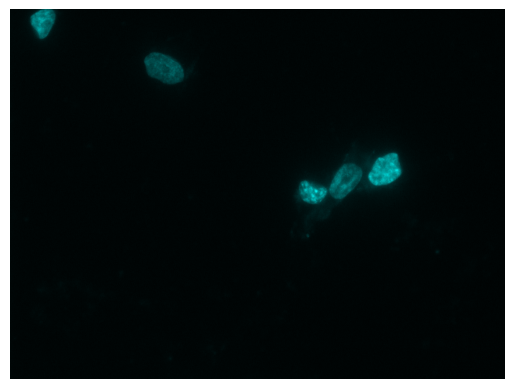

In [16]:
nothing = np.zeros_like(no_serum[0])

plt.imshow(np.dstack([nothing, no_serum[0], no_serum[0]])/no_serum[0].max())

plt.axis(False);

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3: Render three-channel composite images</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

For this exercise, create three-channel composite images for both of our treatment conditions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.73].


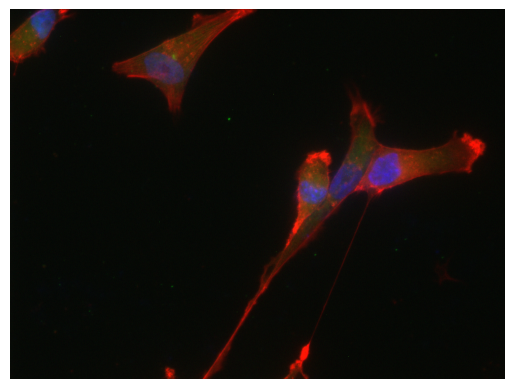

In [17]:
composite = np.dstack([no_serum[1]/1200, 
                       no_serum[2]/1500, 
                       no_serum[0]/no_serum[0].max()])

plt.imshow(composite)

plt.axis(False);

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #4: Identify a "good" threshold</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For this exercise, we'll take a look at the underlying values of our DAPI images to identify what value we can set as a potentially "good" threshold to segment our nuclei from our background. 

We'll need to first take a look at the distribution of all pixel intensities for our DAPI images, and since our DAPI images are a 2D array, it won't plot neatly as is. So you'll first need to make use of the <code>np.ndarray.flatten()</code> to flatten your 2D array into a single dimension, so that it can be used to plot a simple histogram.

Plot a histogram displaying the distribution of values of our two DAPI channels, and plot each channel as its own distribution.

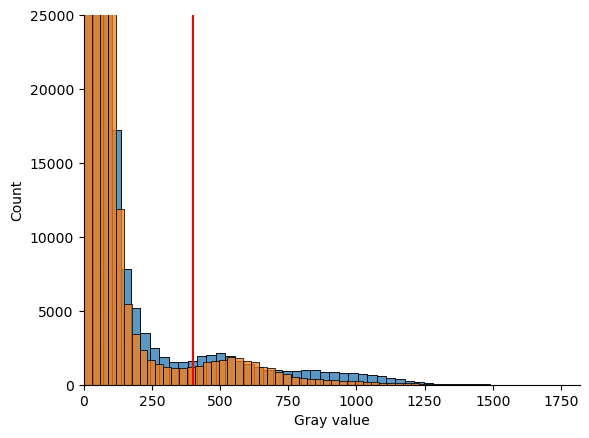

In [18]:
fig, ax = plt.subplots()

sns.histplot(no_serum[0].flatten(),
             bins=50
            )

sns.histplot(serum[0].flatten(),
             bins=50
            )

plt.vlines(400,
           0,
           25000,
           color='r',
          )

plt.ylim(0, 25000)
plt.xlim(0)
plt.xlabel('Gray value')

sns.despine()
plt.show()

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #5: Segment nuclei using your threshold</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 900px;"></hr>

Now that you've identified a good spot to set your threshold, see if you can make use of a conditional statement to threshold your DAPI images, thereby converting it into binary images.

In [25]:
#Started up 9/26 class here
#With our breakpoint for threshold determined by looking at the distribution of pixel intensity values
#we can then use conditional statement to obtain our thresholded binary image
no_serum_thresh = no_serum[0] > 400
serum_thresh = serum[0] > 400
#Result is a 2D matrix that contains only True or False values
#Recall that True is 1 and False is 0.
#Therefore we have a binary image (value space only 0 or 1)

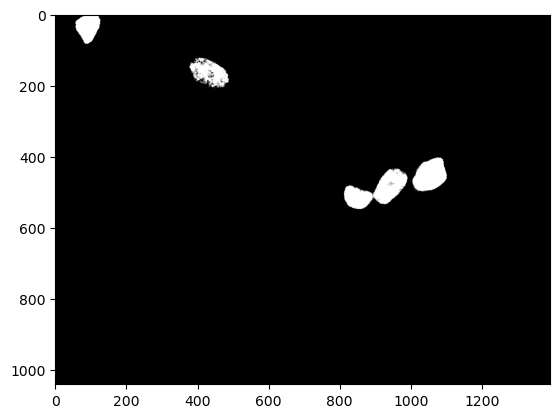

In [31]:
#visualize binary as we would any other image
plt.imshow(no_serum_thresh,
           cmap='gray',
          )

Take a look at the array values now:

In [30]:
#Looking at values in 2D matrix. Only booleans
print(no_serum_thresh)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


You should be able to see now that your thresholded array contains booleans. This is because we applied our conditional statement to each element in our 2D arrays, resulting in a boolean output corresponding to whether or not each element in the array met that condition. Now render your binary images side by side to see how the nuclei have been segmented for both images.

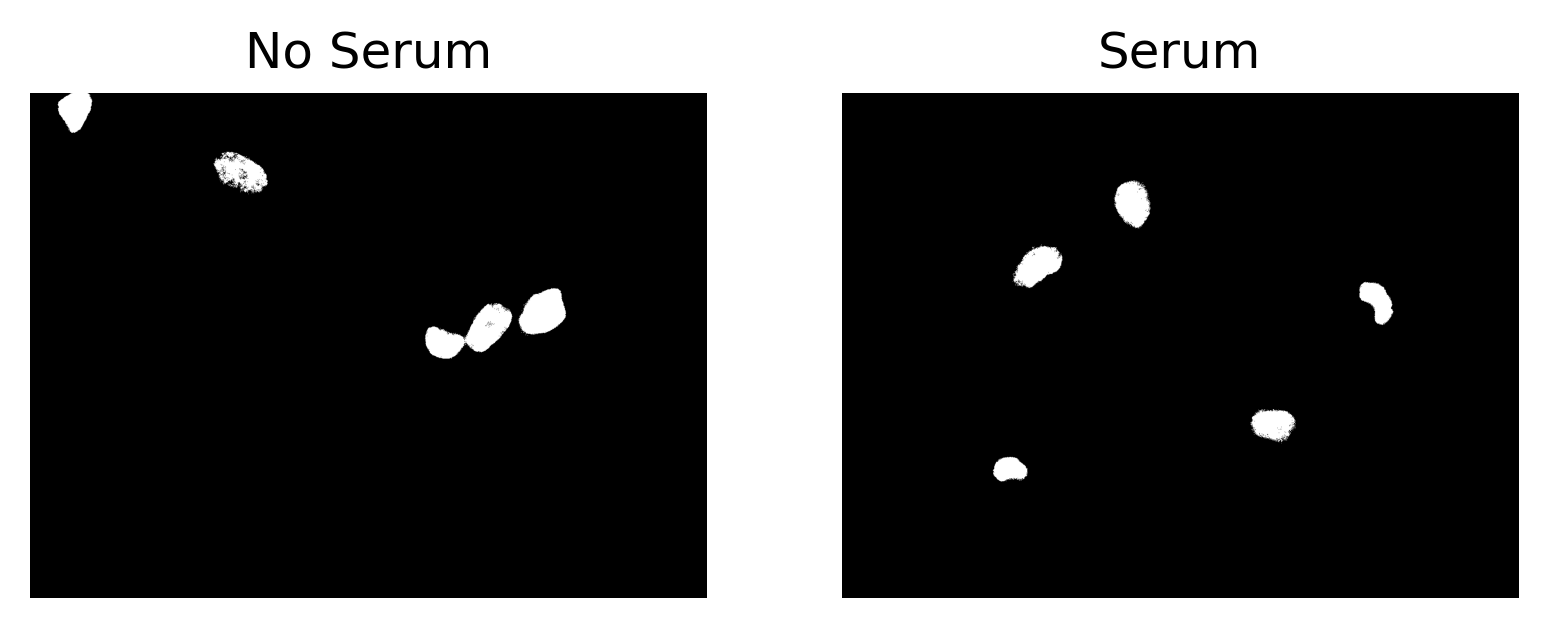

In [34]:
#Set up figure for 2 subplots to see both thresholded DAPI channels side by side
#To see if the threshold worked well for both of them
fig, ax = plt.subplots(1, 2)

ax[0].imshow(no_serum_thresh,
             cmap='gray',
            )

ax[1].imshow(serum_thresh,
             cmap='gray',
            )

ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('No Serum')
ax[1].set_title('Serum')

fig.set_dpi(300)

There are also many other ways to calculate thresholds, and when we reconvene here, we'll go over additional ways to threshold our images.

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


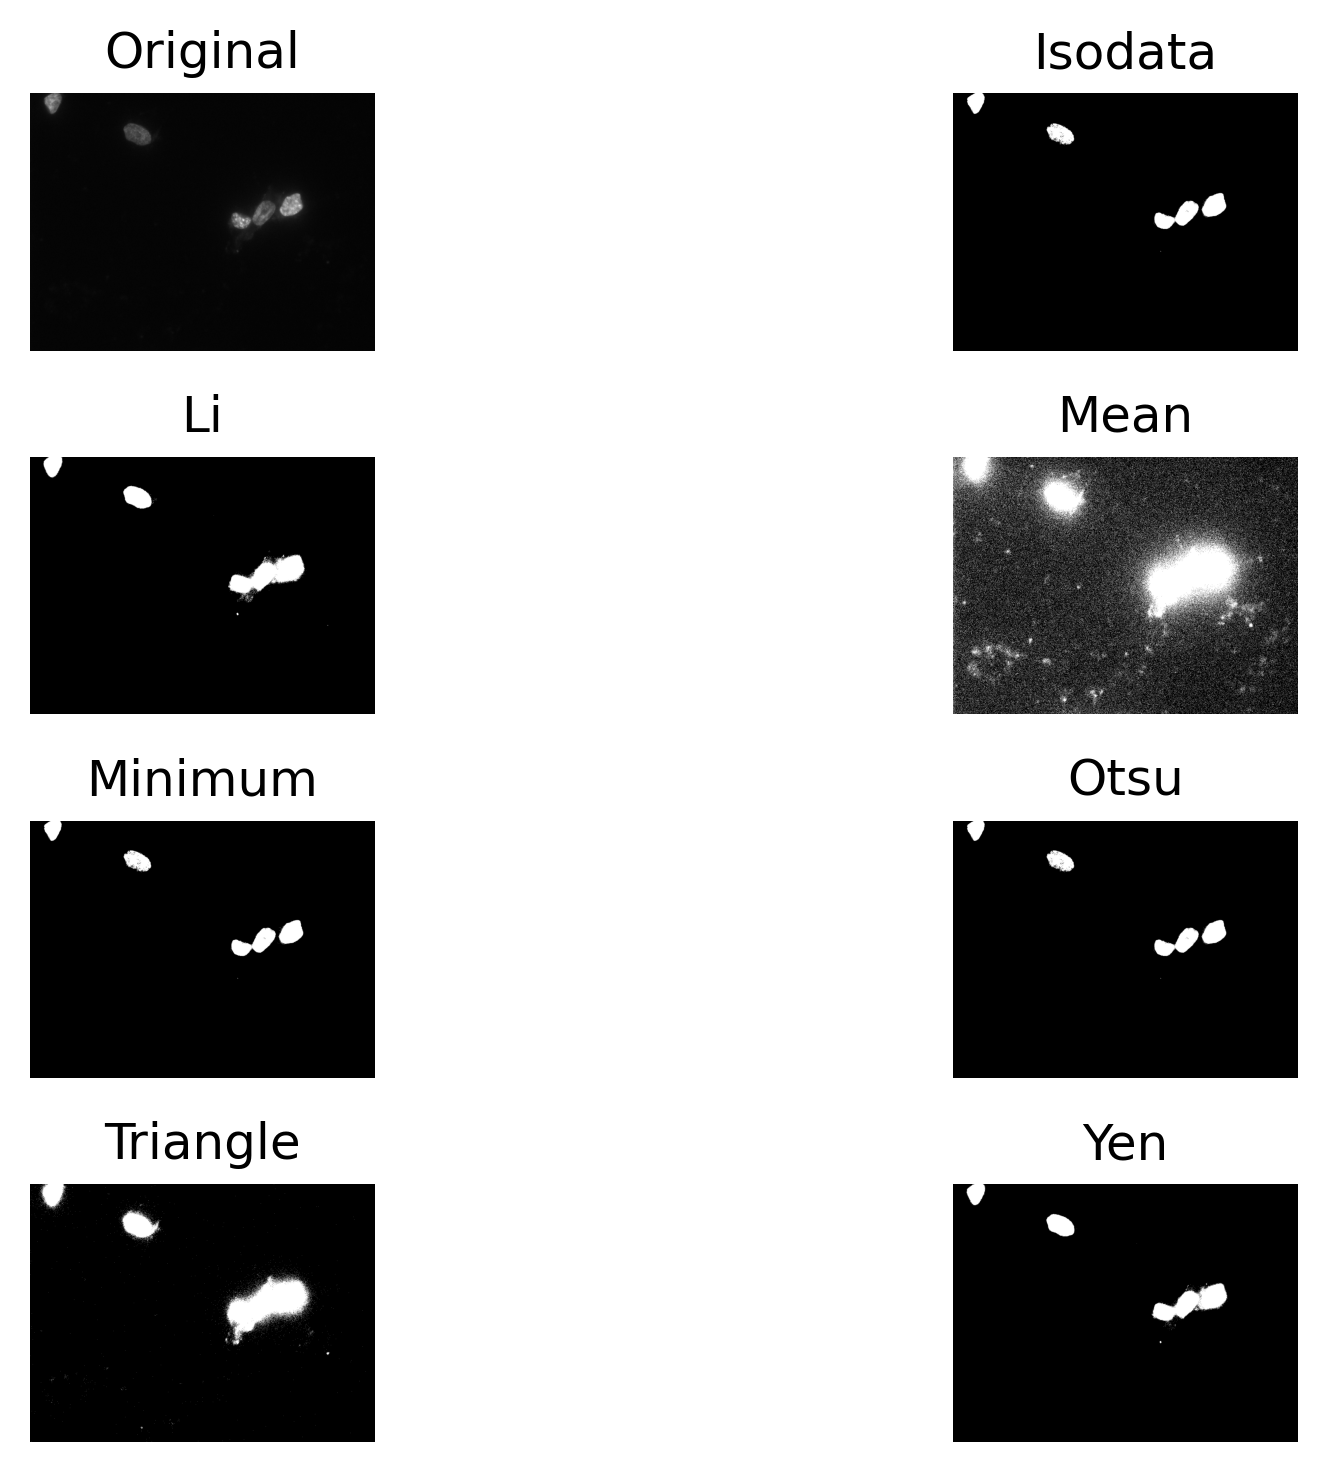

In [36]:
#Cool thing about scikit-image is that we can also try a bunch of different algorithms to calculate a "good" threshold
fig, ax = ski.filters.try_all_threshold(no_serum[0])

fig.set_dpi(300)

If we then wanted to use one of these algorithms to threshold our nuclei, we can call them up from the <code>scikit-image</code> package:

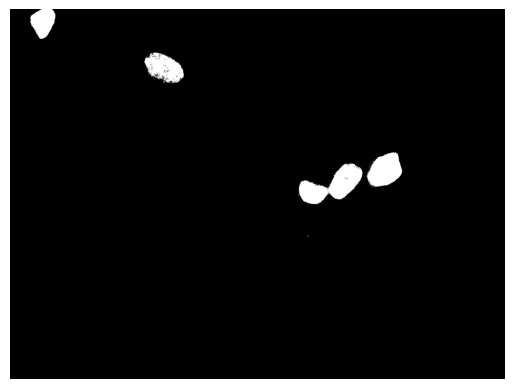

In [41]:
#Lets say we like Otsu way, we can then use that specific function
otsu_thresh = ski.filters.threshold_otsu(no_serum[0])
#Take a look at the resulting otsu_thresh
#It's just a single value because its calculating what a good breakpoint is
#Like what we did visually, but it is doing it with math

#So we need to then set up a conditional statement to obtain our binary image
otsu_binary = no_serum[0] > otsu_thresh

#Then we can visualize binary
plt.imshow(otsu_binary,
           cmap='gray'
          )

plt.axis(False);

We can also apply a local threshold, where if our background signal was uneven in our image, we can take into account the local background to segment our images.

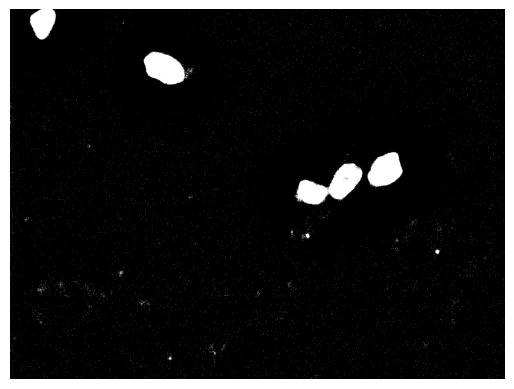

In [47]:
#Another way to threshold is local thresholding
#This is helpful if you have uneven lighting or uneven background signal throughout your image
#Conceptually similar to how we segmented out our signal peaks in Western blot
#Basically taking into consideration the "neighborhood" in which that pixel sits and determining from there what the background is
#And whether or not that pixel is above the background or not
local_thresh = ski.filters.threshold_local(no_serum[0],
                                           355, #Setting our neighborhood size
                                           offset=-50 #Offset to adjust if we still pick up a bunch of actual background as false positives
                                          )

#Now need to obtain binary
local_binary = no_serum[0] > local_thresh

#Visualize binary
plt.imshow(local_binary,
           cmap='gray',
          )

plt.axis(False);

<h1 style="font-size: 40px; margin-bottom: 0px;">Fill holes in a thresholded image</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Sometimes our thresholded image isn't exactly what we want it to be, and in the case of a few of our nuclei, we have some holes that will be helpful to fill so that we capture the entirety of each nuclei. To do this, we can make use of the <code>ndi.fill_binary_holes()</code> function, which is a quick way to fill in holes in our multidimensional binary array. <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html" rel="noopener noreferrer"><u>Documentation for <code>ndi.fill_binary_holes()</code> can be found here.</u></a>

Let's first take a look at one of our thresholded images:

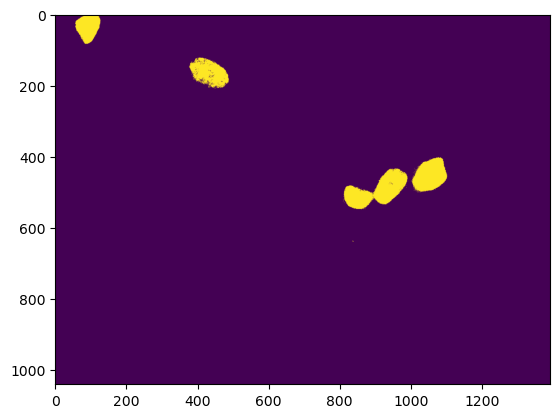

In [48]:
#Take a look at the otsu binary
plt.imshow(otsu_binary)
#Can see that there are some holes within our thresholded nuclei
#We know that biologically this is actually still in the nucleus and should be considered as such in our analysis
#So we need to fill the holes up 

We can see that there are holes within our segmented nuclei, and we can fill them in using <code>ndi.binary_fill_holes()</code>.

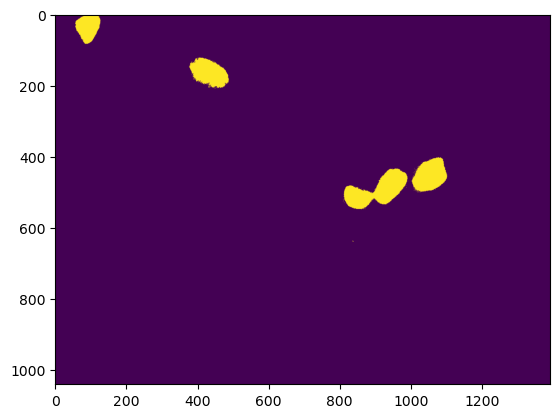

In [50]:
#One way is to use scipy ndimage binary_fill_holes function
#Quick and easy
otsu_binary_filled = ndi.binary_fill_holes(otsu_binary)

plt.imshow(otsu_binary_filled)
#Can see holes are filled

Another way, would be to do a dilation followed by an erosion, which will help to fill in gaps while limiting how much we expand our region of interest. To do this, we'll make use of some functions within scikit-image:

<ul>
    <li><code>ski.morphology.disk()</code> - this creates a binary circle for us to use as a footprint in our dilation and erosion. <a href="https://scikit-image.org/docs/0.25.x/api/skimage.morphology.html#skimage.morphology.disk" rel="noopener noreferrer"><u>Documentation is here.</u></a></li>
    <li><code>ski.morphology.dilation()</code> - this will increase the size of bright regions (our ROI). <a href="https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_morphology.html#dilation" rel="noopener noreferrer"><u>Documentation is here.</u></a></li>
    <li><code>ski.morphology.erosion()</code> - this will increase the size of dark regions (our background). <a href="https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_morphology.html#erosion" rel="noopener noreferrer"><u>Documentation is here.</u></a></li>
    <li><code>ski.morphology.closing()</code> - this will performs a dilation followed by an erosion, and can be another way to achieve a similar result. <a href="https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_morphology.html#closing" rel="noopener noreferrer"><u>Documentation is here.</u></a></li>
</ul>

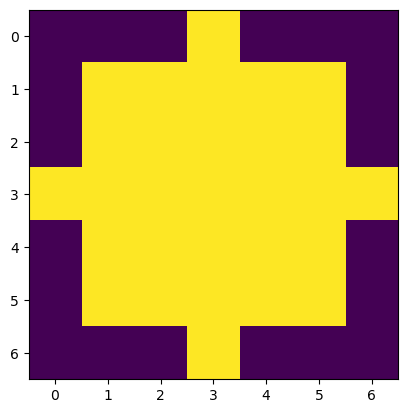

In [64]:
#Looking at the disk function
#Can see it gives us a binary "disk"
plt.imshow(ski.morphology.disk(3))

In [ ]:
#We can dilate our image - expand area covered by 1s
#How much it expands is based on footprint, which we set using the binary disk
#This will cause expansion of 1s into regions of 0s
#So holes will end up getting filled, but also we will capture a greater ROI
otsu_dilation = ski.morphology.dilation(otsu_binary, 
                                        footprint=ski.morphology.disk(3),
                                       )

plt.imshow(otsu_dilation)

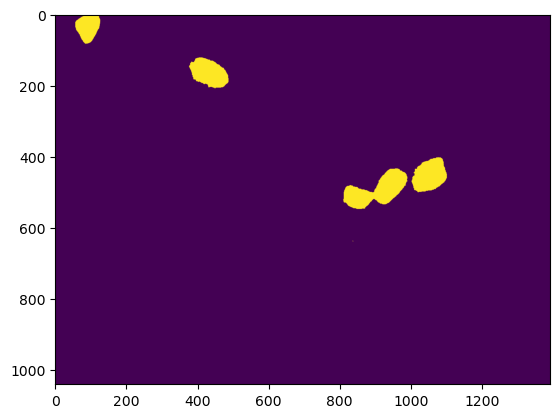

In [66]:
#We can then erode the edges away again to shrink our ROI back to roughly where it was before
otsu_erode = ski.morphology.erosion(otsu_dilation, 
                                    footprint=ski.morphology.disk(3.25)
                                   )

plt.imshow(otsu_erode)

In [ ]:
#You can run this if you want to see the differences
#This uses a bitwise exclusive or operator ^
#If there is a mismatch in boolean values between the two 2D matrices, then the output will be True at that position
#If there is alignment True/True or False/False, then the output will be False at that position
#So basically if there is a mismatch True/False or False/True, the output value is True, and we can visualize the difference

plt.imshow(otsu_erode ^ otsu_dilation)

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #6: Use binary threshold as a mask</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For this exercise, see if you can take what you now know about working with images and mathematical operations on arrays to use your segmented nuclei as a mask to look at just our region of interest (ROI) in the green and red channels.

In [67]:
#Take a look at our binary
#It is just a 2D matrix of booleans
#Therefore we can interpret it as 0s and 1s
otsu_erode

#And if we want to use it as a mask, we can just multiply it into our other channels
#Any spot where it is 0 in our binary will be zero'ed out
#Any spot where it is 1 in our binary will keep its gray value

#Can kind of think of it like a face mask or halloween ghost costume
#Eye holes are the 1s and everything else is 0s (covered up)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(1040, 1392))

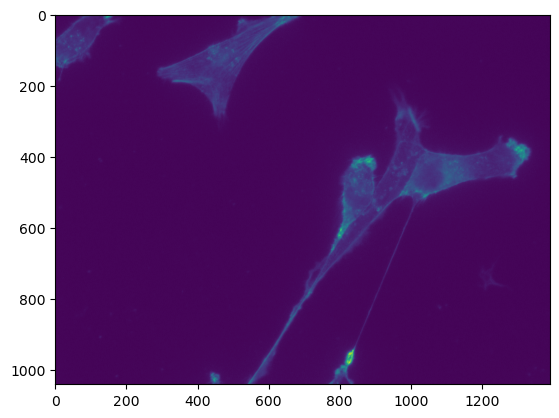

In [68]:
#visualize original phalloidin channel as example
plt.imshow(no_serum[1])

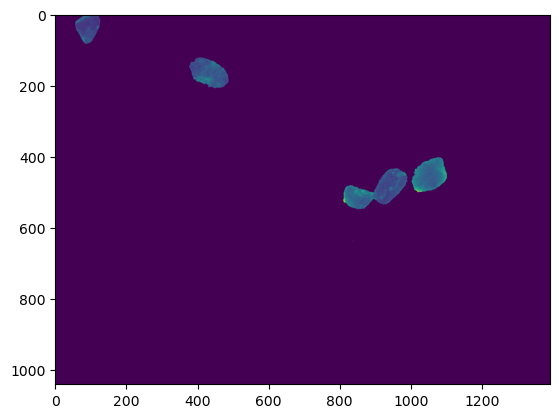

In [71]:
#Apply our binary mask to phalloidin channel
#Our binary was thresholded to just be nuclei
phall_mask = no_serum[1] * otsu_erode

#Visualize it after it has been masked
plt.imshow(phall_mask)

#We basically now are working with our binary mask as an ROI on the phalloidin channel

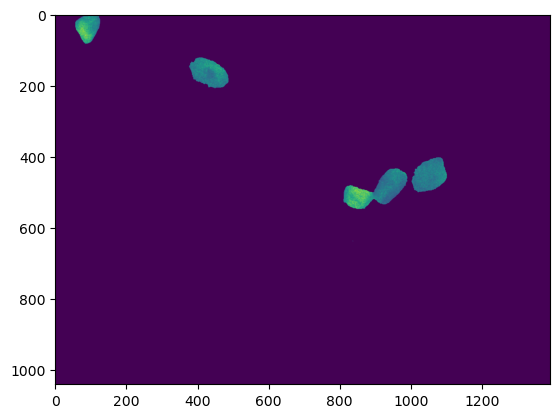

In [72]:
#Can do the same with YAP channel
yap_mask = no_serum[2] * otsu_erode

#Thinking about this biologically, we're just looking now at nuclear YAP signal
plt.imshow(yap_mask)

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #7: Segment cells and/or cytoplasm</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For this exercise, practice applying what you've learned so far to image analysis to pull cells as our ROI or just the cytoplasm.

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


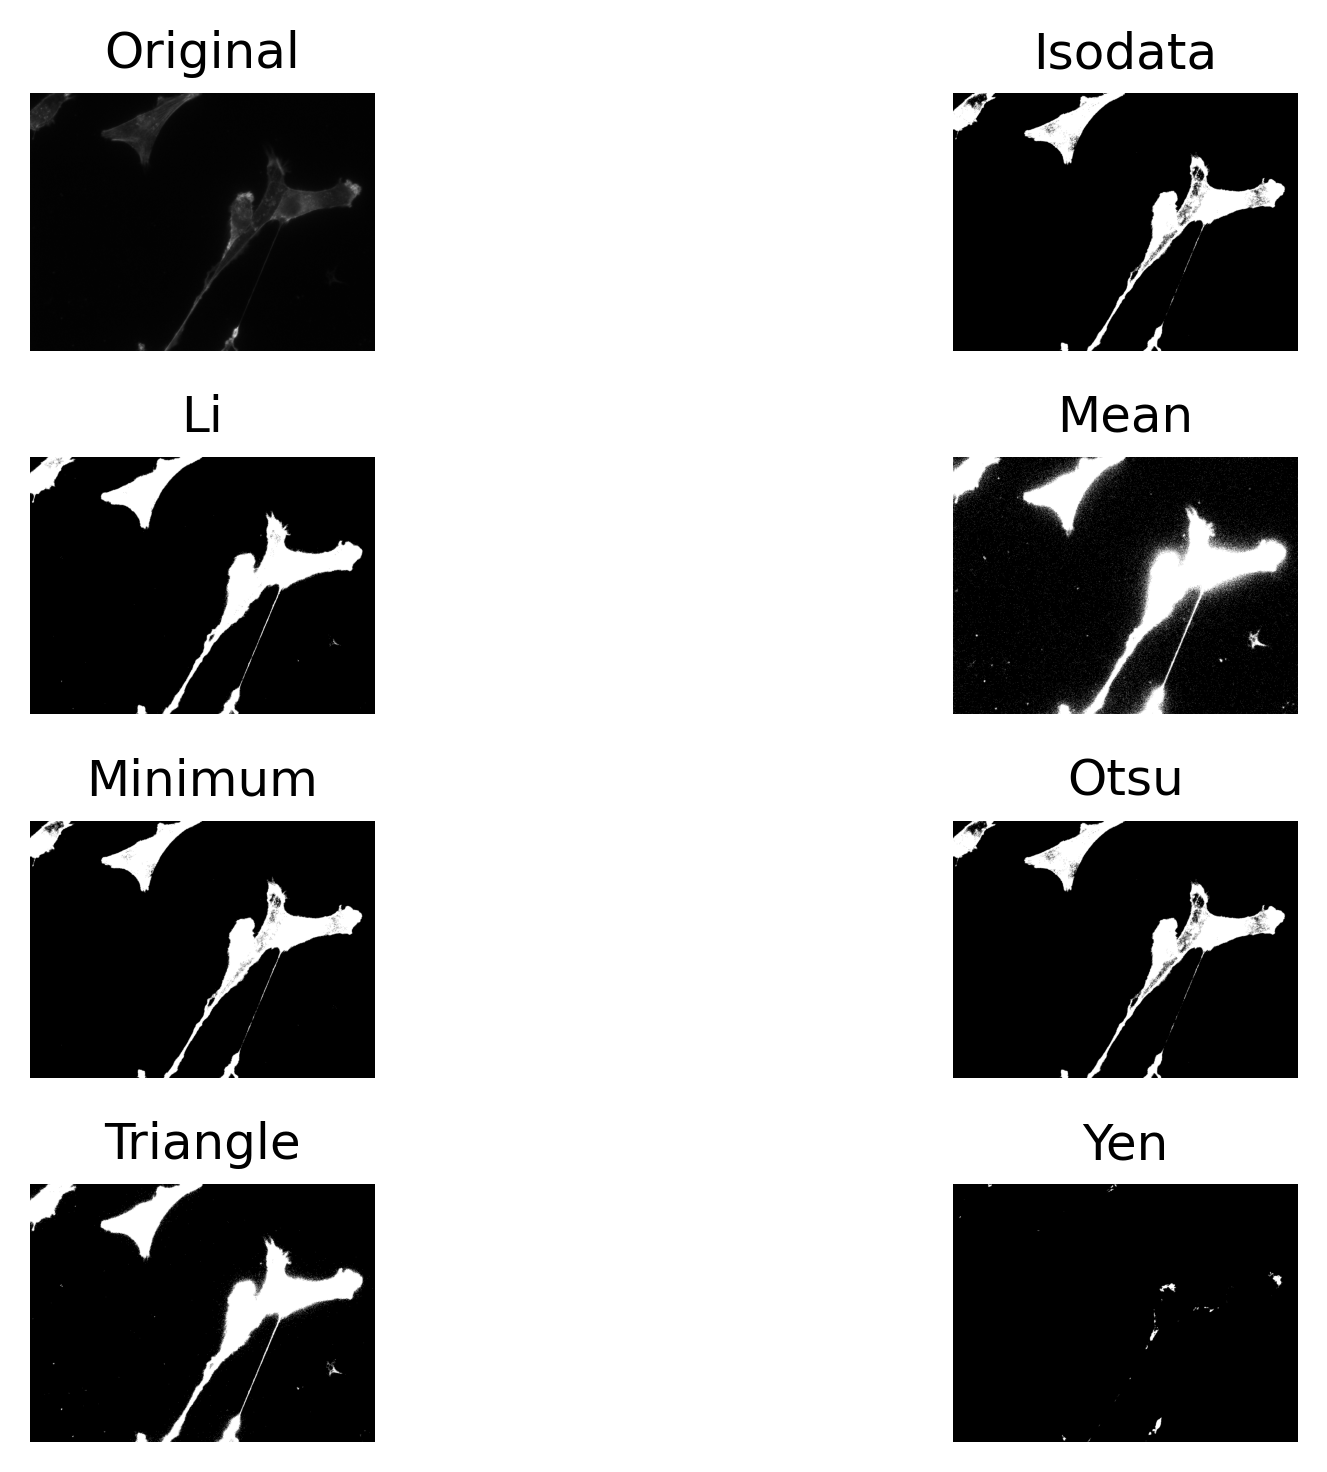

In [73]:
#Lets find a good threshold for our phalloidin channel, which can let us pull out just the cytoplasm of our cells
fig, ax = ski.filters.try_all_threshold(no_serum[1])

fig.set_dpi(300)

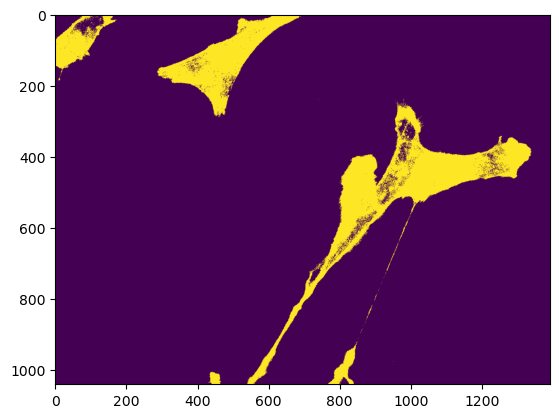

In [76]:
#Isodata looked fine, so lets work with that
phall_thresh = ski.filters.threshold_isodata(no_serum[1])

phall_thresholded = no_serum[1] > phall_thresh

plt.imshow(phall_thresholded)

In [77]:
#Fill the holes since we can see that we have plenty of holes that would correspond to regions in cytoplasm that we're interested in
phall_thresholded = ndi.binary_fill_holes(phall_thresholded)

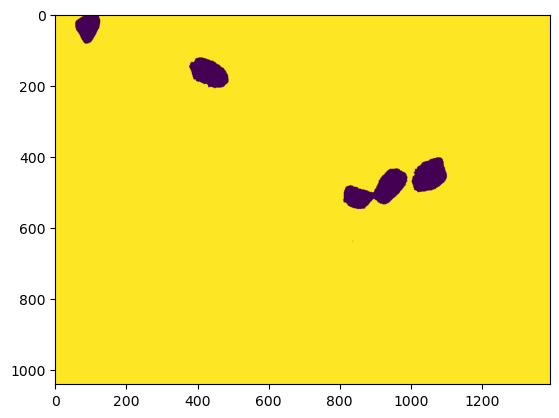

In [82]:
#Can play around with the ~ operator
#Bitwise inversion - flips True to False and False to True
#If we apply this to our thresholded nuclei, we are telling Python we are interested in everything that is not nucleus
#Visualize this
plt.imshow(~otsu_erode)

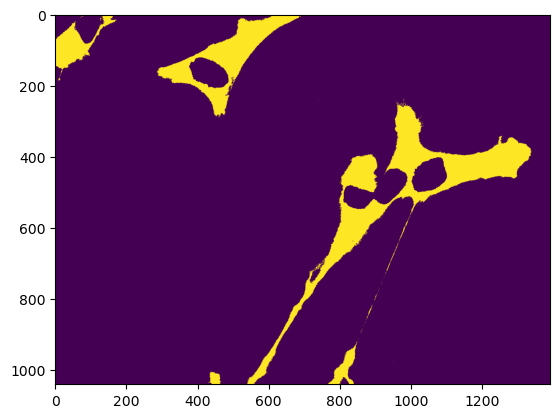

In [83]:
#Can then use the inverted nucleus binary as a mask on top of our thresholded cell cytoplasm
#Now we are left with just cytoplasm, so if we wanted, we can then focus on cytoplasmic YAP signal
plt.imshow(phall_thresholded * ~otsu_erode)